<a href="https://colab.research.google.com/github/kohncory/Teaching_R_Sample/blob/main/FA25_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL 175 - Colab 4 (Chapters 3 and 4)
# Sampling Simulations: Standard Error and Confidence Intervals

This file was made by Dr. Cory Kohn (Scripps and Pitzer Colleges).

### Learning outcomes:
*   Interpret histograms and other distribution plots to approximate or read measures of location (e.g., mean and median) and variability (e.g., range and quartiles).
*   Investigate sampling error and understand that larger samples have less sampling error.
*   Understand the sampling distribution of an estimate like a mean and describe when it is approximately normal.
*   Simulate a sampling distribution and compare empirical standard error to the theoretical expectation (s/√n).
*   Develop an intuition for why changing the sample size, the simulated population's standard deviation, or confidence level changes standard error and/or confidence interval width.
*   Interpret confidence intervals and visualize confidence intervals to understand coverage in a (theoretical) sampling context.


## Activities & Questions
For each lab, add new code **and** text cells (or **`#`**-marked comments within code cells) to the bottom and/or within the tutorial below to practice the activities.

For this lab, the questions are integrated throughout the lab activites instead of listed at the end.

### Simulations in statistics
In statistics, simulation is a powerful technique that uses mathematcal equations combined with random sampling to model aspects of real-world phenomena, allowing statisticians to explore the behavior of statistical methods and systems under various conditions. Simulation involves creating a virtual environment where events unfold based on probabilities (i.e., a statistical model) and enabling the study of complex systems without the need for real-world experiments. Simulations use random numbers to represent the unpredictable nature of real-world events, mimicking how data is generated in a given scenario. By repeatedly running the simulation, statisticians can observe the range of possible outcomes and their probabilities, providing insights into the behavior of the system being studied. Simulations also allow researchers to evaluate the performance of statistical methods under different conditions.

R has a wealth of tools that allow us to create statistical models of various characteristics and then use random numbers to create samples. We could implement the following simulation lab entirely within Colab or RStudio using quite a bit of code, but JASP has some nice features that allow us to skip the code and it produces a lot of pretty analyses.

I want your focus in this lab to be on building an understanding and intuition for the statistical ideas -- not on reading and writing code. So we will primarily work in JASP.

### JASP's ***Learn Stats*** module
Open a fresh JASP session. We will not be loading in a dataset. Instead, all data we will work with will be simulated using tools within the Learn Stats module.

Learn Stats is not a visible analysis module by default when you install JASP. If you didn't already add it, follow the directions under Colab 1's section "The console in JASP" to add this and the other modules we may use this semester to your analysis list at the top.

### Descriptive Statistics
Select the "Learn Stats" button at the top then select "Descriptive Statistics." *Note this is **not** the Descriptive Statistics option that you used before when we were plotting data sets.*

Select the following **non-default** options:

Data options panel --
* Data input type: Random sample
* Distribution type: Continuous
* Distribution: Normal distribution

Plots panel --
* Histogram / Barplot
* Show density (histogram only)
* unselect Dot plot

Distribution options panel --
* SD (σ) set to 1

Here's the resulting simulated data set with these settings:

!["Descriptive Statistics simulation settings"](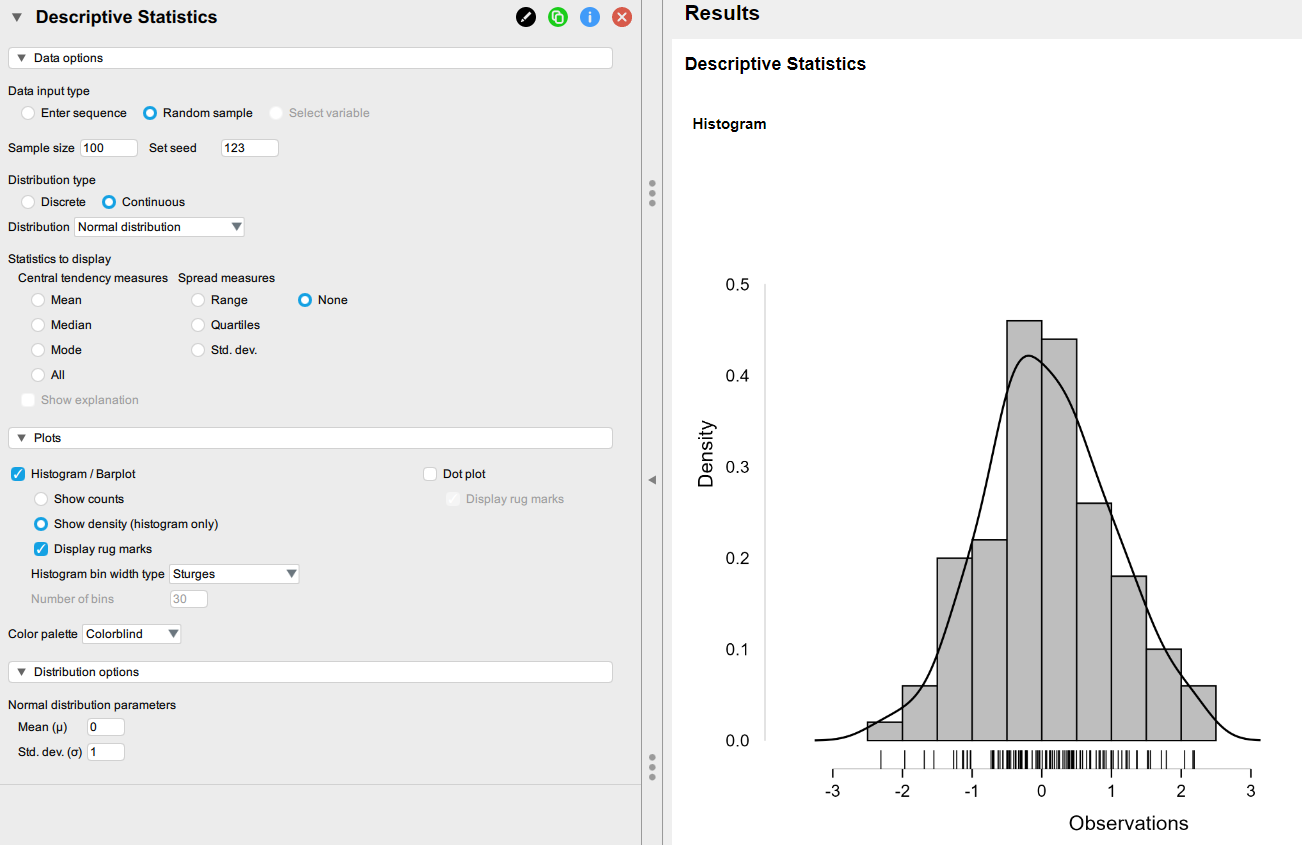 "Descriptive Statistics simulation settings")

This is a random draw (random number seed = 123) of continuous values for a sample size n = 100 from a parent population that is a standard normal distribution (i.e., population mean = 0, population SD = 1).

Remember that in real life we wouldn't know the population distribution type (e.g., normal or whatever else) and parameters (e.g., mean and SD) for whatever we are measuring, like fish length. Although we can more- or lesss-precisely estimate them using data fish length data! Here in simulation-land, we'll use a specific defined parent population. We won't bother changing the parent population for this lab, but feel free to do so yourself, especially to get a feel for the Central Limit Theorem and/or how changing the population's standard deviation influences the precision of estimates.

Looking at the figure, the rug marks at the x-axis show the values for the individual observations. The histogram uses Sturges binning to show the data's distribution. The density curve is a smoothed interpretation of the histogram.

The y-axis is density, not proportion of observations. For example, if you simply add the heights of each histogram bin together the sum will be much greater than 1. However, if you integrate the density curve, then its area will in fact equal 1, indicating 100% of observations. The difference between these is that in the first case you were ignoring the bin width, which is considerably smaller than you might think. Density on the y-axis is the height such that a bin's height times its bin width equals the proportion of observations in that bin. With these settings where the bin width is approximately 0.5, it is easy to see these distinctions by flipping the Plots panel > Show density setting to Show counts and comparing the same position on the y-axis between these options. Remember our sample size is 100.

##### **Lab Questions - Density**
* With the y-axis set to Density, what is the total area encompassed by the sample observations (i.e., either the total area of the histogram bins or the total area of the density curve)?
* With the y-axis set to Counts, what is the total area encompassed by the sample observations?

This concept of density applies when we look at probability density functions for population distributions (not samples like now) later in this lab.

##### **Lab Questions - Random number seed**
* Try changing the value for "set seed" under the Data options panel. What changes and why?

Change the seed to the value 1234, but keep all other settings as per the figure and description above.

##### **Lab Questions - Seed = 1234**
* Is the histogram symmetric or assymmetric? If assymetric, is it left/negative or right/positive skewed?
* Is the population this sample has been drawn from skewed as well? Explain why you do or do not think this.

With your settings configured as before (including seed = 1234), explore the various "statistics to display" within the Data option panel. Select each central tendency measure and each spread measure. Make sure you understand the definition for each of these statistics.

##### **Lab Questions - Statistics with Seed = 1234**
* Is the mean greater than or lesser than the median? Why?
* Why is the mode undefined for this sample? What setting could you change to get a defined mode?
* The width of the second-to-third quartiles is much wider than the width of the first-to-second quartiles. Why?
* Approximately how many observations are within one standard deviation of the mean (i.e., within mean - SD and mean + SD)? Approximately how many observations are more than three standard deviations of the mean (i.e., less than mean - 3\*SD or more than mean + 3\*SD)? For this sample, were these values close to the "68-95-99.7 rule"? Make sure you explain this rule within your response.
* Use R as a calculator with values provided in your JASP simulation to calculate the sample's standard error.

### Standard Error
Select the "Learn Stats" button at the top then select "Standard Error." We'll keep all of the default settings for now.

Here's the resulting simulated data sets with these default settings:

![SE Simulation](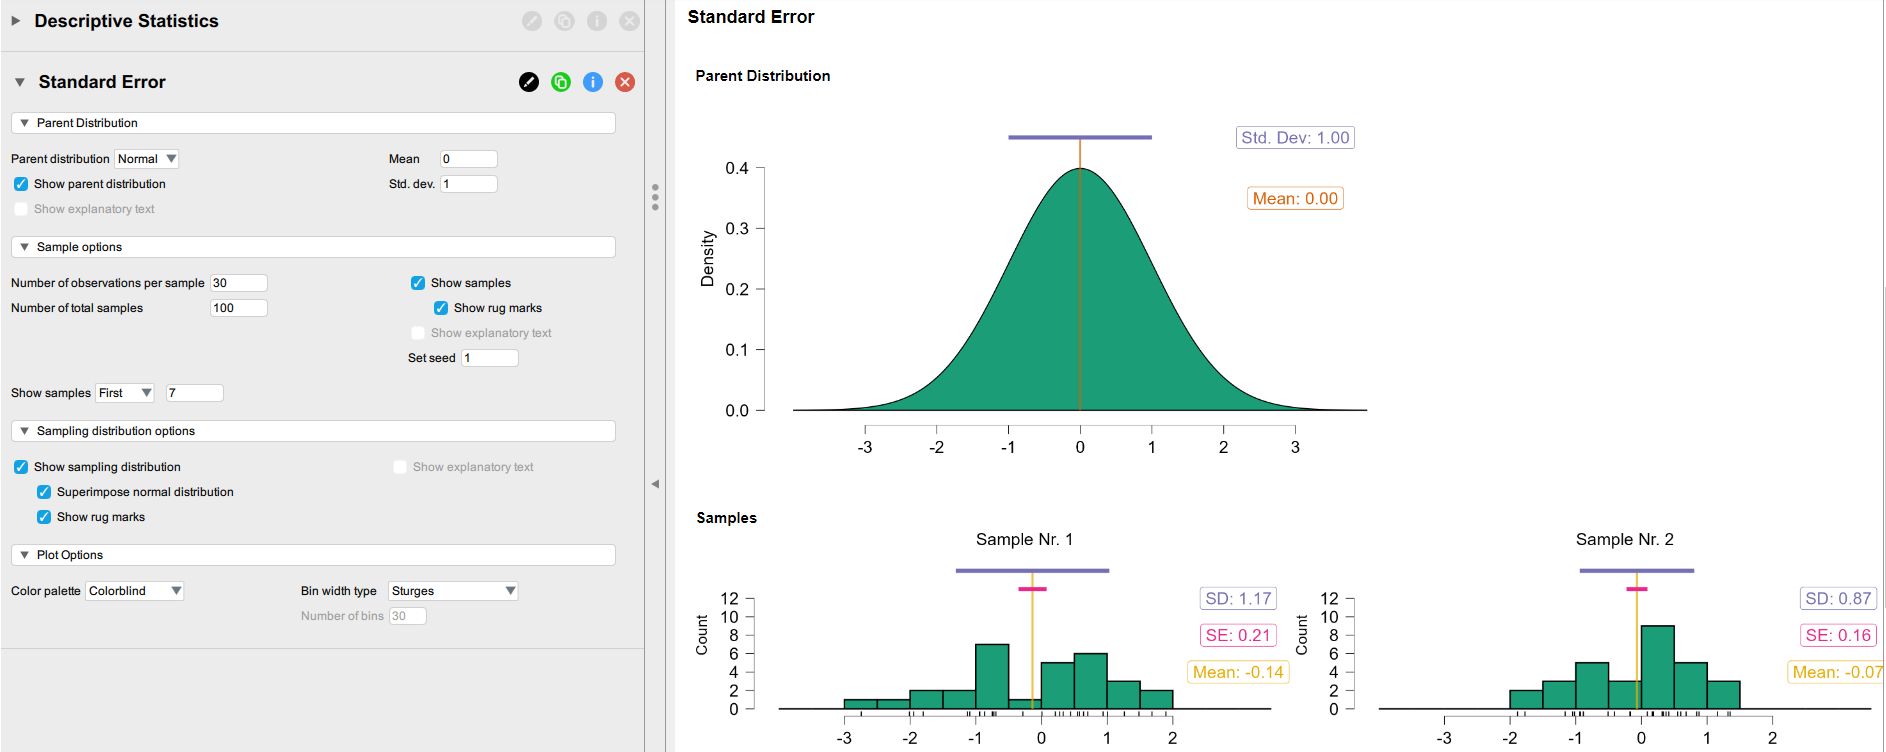 "SE Simulation")

Scrolling down we see other samples and then the sampling distribution of the mean:
![Sampling Distribution of the Mean](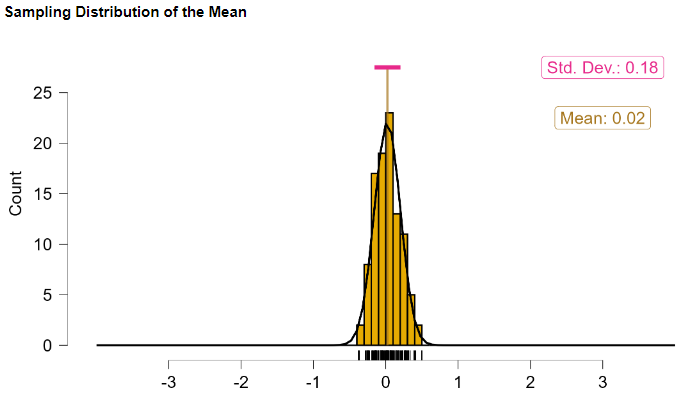 "Sampling Distribution of the Mean")

As before with the Desciptive Statistics simulation, we are randomly drawing continuous values from a standard normal distribution (population mean = 0, population SD = 1). We see this as our Parent Distribution.

However, this time our sample size n = 30 instead of 100. And instead of creating one sample like before, now we are creating 100 samples. Our random number seed happens to be 1.

Due to space limitations, JASP is only dispalying the first seven of our 100 samples (and the image above only shows the first two). Each sample is shown with its own histogram, SD, SE, and mean values. Note that the x-axis is aligned for the samples within the same column (e.g., on the left are odd-numbered samples: 1, 3, 5, and 7). This x-axis alignment allows you to easily visually compare the summary statistics across sample.

Below the sample histograms is the sampling distribution for the mean. Recall that each value in this data set is the mean calculated for one of the samples. This is the distribution of those sample means. Notice how the sampling distribution for these default values is approximately normal. Unlike with the Descriptive Statistics density curve earlier, the black curve superimposed on the histogram is the theoretical normal distribution -- not the smoothed interpretation of the histogram.

##### **Lab Questions - Default settings**
* What is the population SD and population mean? What is sample 1's SD and mean? How are these similar yet different?
* Use R as a calculator with values provided in sample 1 (and the default settings) to calculate sample 1's standard error. You should get the SE value reported by JASP for sample 1. If not, check your understanding of the definition for SE and fix your work here and when you calculated SE with the Descriptive Statistics simulation above.
* How do the statistics of SD, SE, and mean compare across the seven visible samples? Why do they differ?
* What is the population SD and population mean? What is the sampling distribution of the mean's SD and mean? Why are these similar yet different?
* Use the sampling distribution of the mean to state how much the 100 sample means differ from one another.

So, one sample gives us a lot of information about the population, but it is not perfect. Ideally, we might want to take repeated samples (matching the original sample size) to understand even more, for example to make a sampling distribution for a statistic like the mean. In practice, we never do this.

##### **Lab Questions - Why does the sampling distribution for a statistic matter?**
* Why do we never actually take repeated samples of a set sample size in order to empirically construct a sampling distribution for a test statistic? To help you answer this, recall the "68-95-99.7 rule" for SD and apply this rule to the sampling distribution of the mean. Approximately what percentage of sample means are within two standard deviations of the grand sample mean? What statistic, not yet covered in this lab, does this seem to relate to and why?

##### **Lab Questions - Changing random number seed**
* Change the seed a few times to values of your choice, keeping all other settings as before. *Note, your figures will only update once you click out of the value field or press [Enter].* Do the results change greatly?

##### **Lab Questions - Changing n**
* Return the random number seed to 1 and then change the number of observations per sample to 5, keeping all other settings as before. *Note, your figures will only update once you click out of the value field or press [Enter].* Do the results change greatly from when n = 30? Be specific.
* What's the sum across histogram bins for sample 1? And for the sampling distribution of the mean?
* Keeping all other settings as before, change the number of observations per sample to 100. Do the results change greatly from when n = 30 and n = 5? Be specific.
* Record the standard deviation of the sampling distribution of the mean when n = 5, then n = 30, then n = 100. What is the trend?

##### **Lab Questions - Changing the number of samples**
* Return the random number seed to 1 and the number of observations per sample to 30. Then change the number of total samples to 20 (down from 100), keeping all other settings as before. *Note, your figures will only update once you click out of the value field or press [Enter].* Do the results for the sampling distribution of the mean change greatly? Be specific.
* Is the sampling distribution of the mean more or less symmetric than with 100 total samples? Why?
* Keeping all other settings as before, change the number of total samples to 1,000. Do the results for the sampling distribution of the mean change greatly from when it was 20 and 100 total samples? Be specific.
* Is the sampling distribution of the mean more or less symmetric than with 100 total samples? Why?

##### **Lab Questions - Standard error**
* While working on this lab, you overhear another pair of students exclaim, "This simulation analysis is titled 'standard error,' but we have hardly examined 'standard error' at all!" Is that a correct or incorrect statement? *Hint, review the definition of standard error and why it is a useful concept.*
* Calculate the expected theoretical standard error for this population distribution and the sampling effort of n = 100. How does the standard deviation of the sampling distribution of the mean for however many total samples --it shouldn't matter too too much-- compare to the expected theoretical standard error?

### Confidence Intervals (CI)
Select the "Learn Stats" button at the top then select "Confidence Invervals."

Select the following **non-default** options:

The top (unnamed) panel --
* Show last 100 (repetitions); either drag the circle to the top or enter 100 and press [enter]

Plots panel --
* Convergence plot

Repeatability panel --
* Set seed to 1 (check the box)

Here's the resulting simulated data set with these settings:

![Confidence Intervals simulation](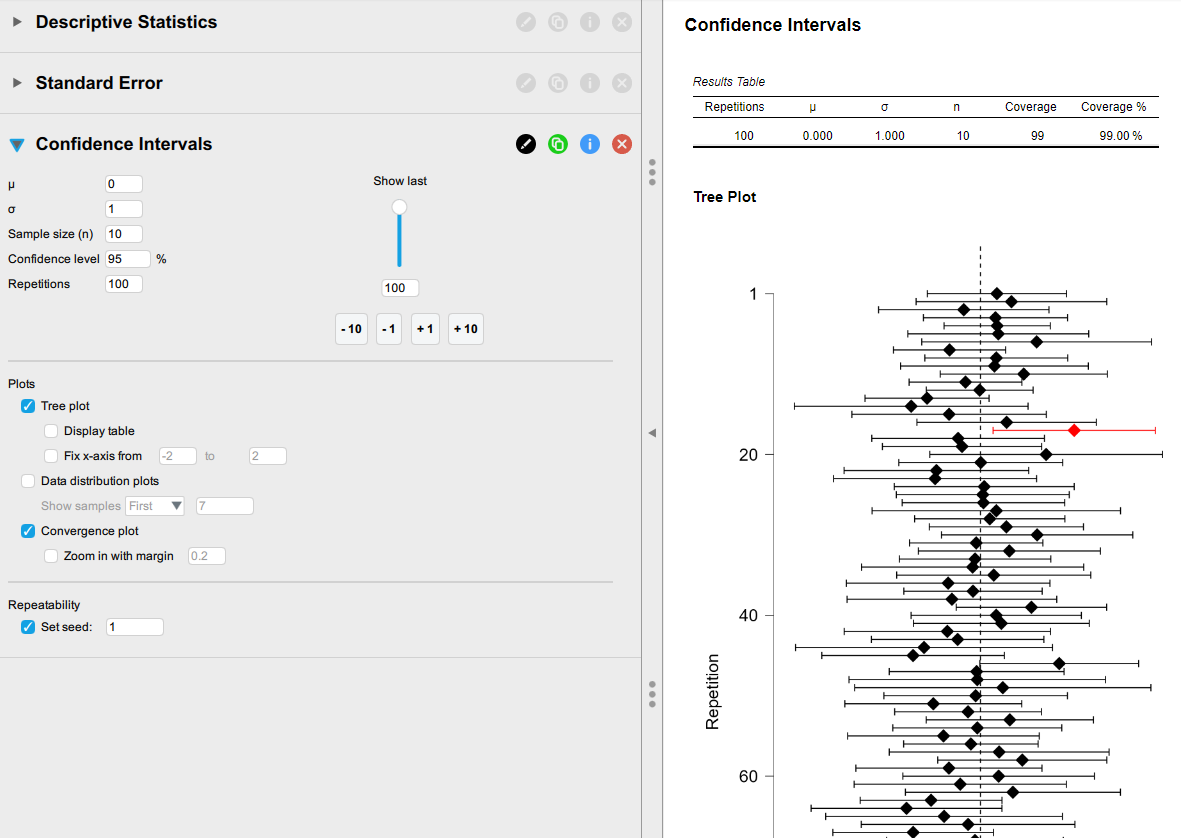 "Confidence Intervals simulation")

Scrolling down we see other samples' confidence intervals in the Tree Plot and then the Convergence Plot:
![CI Convergence Plot](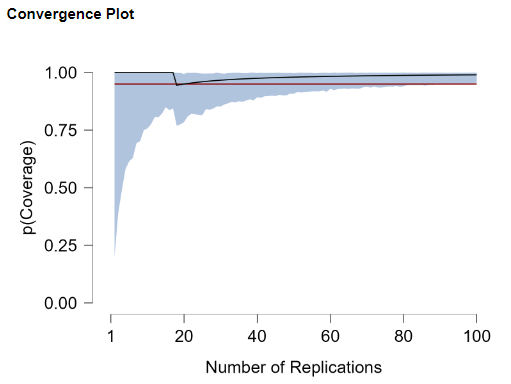 "CI Convergence Plot")

As before with all other simulations in this lab, we are randomly drawing continuous values from a standard normal distribution (population mean = 0, population SD = 1).

However, this time our sample size n = 10. And as with the SE simulation we are creating 100 samples (referred to as repetitions here). Our random number seed happens to be 1.

Due to space limitations above, the image only shows the first ~65 confidence intervals within the Tree Plot, but JASP is configured to display all 100. Each sample is shown as a horizontal line centered on a diamond. The diamond is that sample's mean and the extents of the line are that sample's 95% confidence interval. Note that the dashed vertical line is at the population's mean of zero.

Each of the Tree Plot's black samples (95% CI and mean) overlap the population mean. Each of the red ones do not, i.e., the population mean is either lower or greater than the 95% confidence interval. The Results Table at the top summarizes these results. For this example, 99 of the 100 independent repeated samples of n = 10 from a standard normal population had 95% confidence intervals that included the population mean, while 1 did not. This is a coverage of 99%.

Below the Tree Plot is the Convergence Plot. Unlike the Tree Plot which showed the replication number on the y-axis, the Convergence Plot shows this on the x-axis. Its y-axis is the coverage proportion -- the proportion of 95% confidence intervals that include the population mean.

##### **Lab Questions - Convergence Plot**
* For these data in particular, why is the black line at perfect coverage for the first 17 replications before dropping at replication 18?
* What do you think the shaded region in the back indicates?
* Why does this shaded region tend to get narrower from left to right?
* Why is the shaded region bounded at perfect coverage, p(Coverage) = 1?
* What does the horizontal red line indicate; *hint, what is it's (approximate) value?.*

Within the Repeatability panel, change the seed to 2.

##### **Lab Questions - Random number seed = 2**
* What is the expected coverage? What is the realized coverage for these 100 repetitions?
* What patterns have changed in the Convergence Plot? Not counting the red line's vertical position, which has indeed stayed the same, what else about the relationship between the red line and the plotted data has stayed the same?
* Did this seed's results help you better understand the Convergence Plot, and especially the shaded region in the back? Please explain.

Keep the seed set to 2. Within the Plots panel, select the Display table option. This will show a table of data for each of the 100 repeated sampling efforts. For some reason (an error?) the column labeled "Estimate" is simply the sample size, n.

##### **Lab Questions - CI Table**
* Use R as a calculator with the values provided in JASP for repetition 1 to calculate that sample's standard error.
* Use the 2*SE rule of thumb to estimate the lower and upper bounds of that repetition's 95% CI.
* Why are your calculated lower and upper bound 95% CI values for reptition 1 not matching the values shown in the table? *Hint, this should be a difficult question for you to answer at this point in the course; note that the width of the CI is being underestimated instead of overestimated.*

Change the sample size to n = 1000.

##### **Lab Questions - n = 1000**
* Use R as a calculator with the values provided in JASP for repetition 1 to calculate that sample's standard error.
* Use the 2*SE rule of thumb to estimate the lower and upper bounds of that repetition's 95% CI.
* Is the difference between your calculated 95% CI bounds and JASP's greater or lesser than before with n = 10 per sample? Does this help you think about why your calculated lower and upper bound 95% CI values for reptition 1 are not matching the values shown in the table? Please explain.
* Drastically increasing the per repetition sample size (from n = 10 to 1000) dramatically reduced the 95% CI per each repetition. But did it seem to substanially change the patterns seen in the Convergence Plot?

Play around with the CI simulation's settings, holding n = 10 (reduced from n = 1000 for the prior set of questions) and seed = 2 constant but changing other settings one at a time.

##### **Lab Questions - CI width**
* We saw one way to drastically reduce the 95% CI per each reptition -- increase the per repetition sample size (e.g., from n = 10 to 1000). Can you identify a second simulation setting that will by itself drastically reduce CI width? Provide your specific setting and its value, and explain why this works.
* Can you identify a third simulation setting that will by itself drastically reduce CI width? Provide your specific setting and its value, and explain why this works.

Return to the settings shown in the image at the beginning of the CI portion of this lab. Change the number of reptitions to 1,000. You can deselect the Tree Plot (and its table).

##### **Lab Questions - Reptitions = 1,000**
* What is the expected coverage? What is the realized coverage for these 1,000 repetitions?
* What patterns have changed in the Convergence Plot? Not counting the red line's vertical position, which has indeed stayed the same, what else about the relationship between the red line and the plotted data has stayed the same?
* Did these results help you better understand the Convergence Plot, and especially the shaded region in the back? Please explain.

## Later this semester -- Explore the Central Limit Theorem using the Standard Error simulation

Of relevance later this semester (e.g., Chapter 10), instead of using the standard normal distribution (mean = 0, SD = 1), like we did for all aspects of this lab, try changing the shape of the parent population to a highly skewed distribution within the SE simulations to develop a feel for the Central Limit Theorem.

FYI, there is a Central Limit Theorem option within Learn Stats, but it is identical to the Standard Error option.